In [2]:
text = [
    "The economy is growing fast",
    "Market trends show the economy is booming",
    "Policy changes affect the market and economy"
]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=10)
x = vectorizer.fit_transform(text)

In [4]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (3, 9)>

In [5]:
vectorizer.get_feature_names_out()


array(['affect', 'booming', 'changes', 'economy', 'fast', 'growing',
       'market', 'policy', 'trends'], dtype=object)

In [6]:
x.toarray()

array([[0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 0, 1, 1, 0]])

In [7]:
x.toarray().sum(axis=0)


array([1, 1, 1, 3, 1, 1, 2, 1, 1])

In [8]:
x.toarray().sum(axis=1)


array([3, 4, 5])

In [9]:
vectorizer.get_feature_names_out(), x.toarray().sum(axis=0)


(array(['affect', 'booming', 'changes', 'economy', 'fast', 'growing',
        'market', 'policy', 'trends'], dtype=object),
 array([1, 1, 1, 3, 1, 1, 2, 1, 1]))

In [10]:
z1 =zip(vectorizer.get_feature_names_out(), x.toarray().sum(axis=0))
print([(x, y) for x, y in z1])

[('affect', np.int64(1)), ('booming', np.int64(1)), ('changes', np.int64(1)), ('economy', np.int64(3)), ('fast', np.int64(1)), ('growing', np.int64(1)), ('market', np.int64(2)), ('policy', np.int64(1)), ('trends', np.int64(1))]


In [11]:
word_freq = dict(zip(vectorizer.get_feature_names_out(), x.toarray().sum(axis=0)))

In [12]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (3, 9)>
  Coords	Values
  (0, 3)	1
  (0, 5)	1
  (0, 4)	1
  (1, 3)	1
  (1, 6)	1
  (1, 8)	1
  (1, 1)	1
  (2, 3)	1
  (2, 6)	1
  (2, 7)	1
  (2, 2)	1
  (2, 0)	1


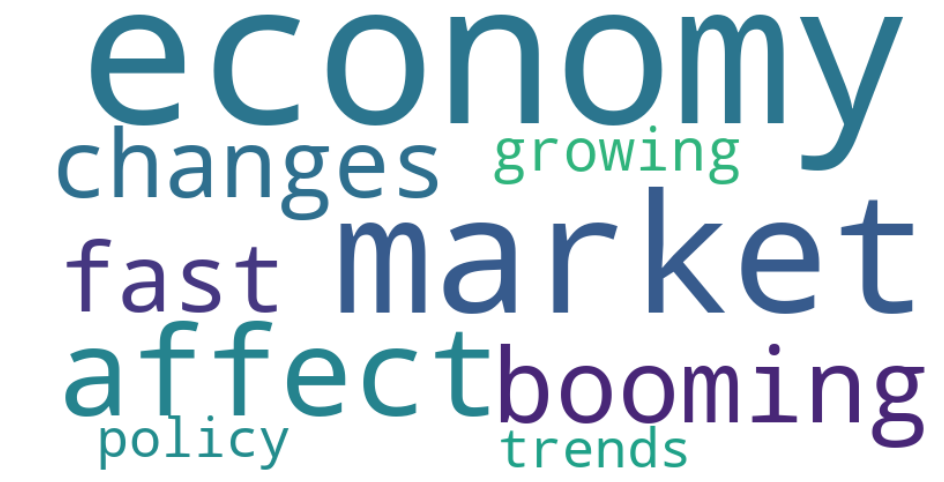

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()